# Section 3: Training a Supervised Learning Model
### Lecture 11: Training an XGBoost Model
- https://xgboost.readthedocs.io/en/stable/get_started.html

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit_card.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [2]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. 
# Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target 
# variable by combining the estimates of a set of simpler, weaker models.

import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [3]:
y_pred = model.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    9,    40]], dtype=int64)

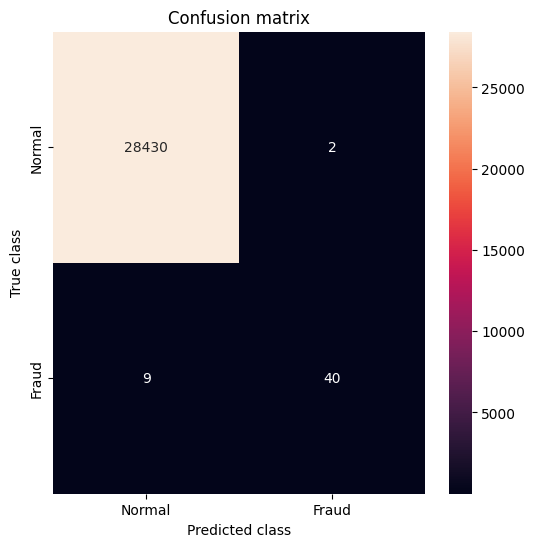

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()